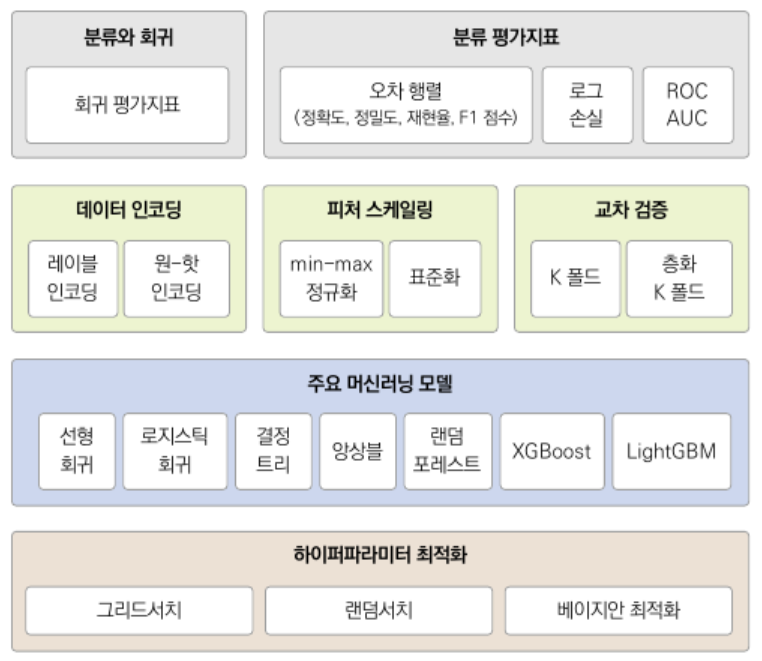

https://www.kaggle.com/code/werooring/ch5-regression-evaluation-metric

### 5.1 회귀와 분류

#### 회귀 평가지표

In [1]:
import numpy as np

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [3]:
true = np.array([1, 2, 3, 2, 3, 5, 4, 6, 5, 6, 7, 8, 8]) # 실제값
preds = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 7, 7, 6, 8]) # 예측값

MAE = mean_absolute_error(true, preds)
MSE = mean_squared_error(true, preds)
RMSE = np.sqrt(MSE)
MSLE = mean_squared_log_error(true, preds)
RMSLE = np.sqrt(mean_squared_log_error(true, preds))
R2 = r2_score(true, preds)

In [4]:
# 출력
print(f'MAE:\t {MAE:.4f}')
print(f'MSE:\t {MSE:.4f}')
print(f'RMSE:\t {RMSE:.4f}')
print(f'MSLE:\t {MSLE:.4f}')
print(f'RMSLE:\t {RMSLE:.4f}')
print(f'R2:\t {R2:.4f}')

MAE:	 0.5385
MSE:	 0.6923
RMSE:	 0.8321
MSLE:	 0.0296
RMSLE:	 0.1721
R2:	 0.8617


#### 분류 평가지표

정확도, 정밀도, 재현율, F1

logloss : 분류 문제에서 타겟을 확률로 예측할 때 기본적으로 사용하는 평가지표. 값이 작을 수록 좋은 지표

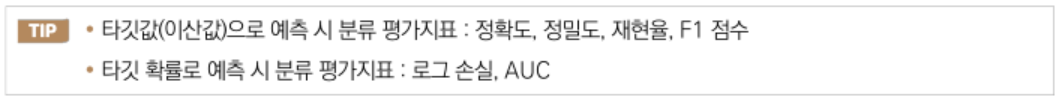

### 5.3 데이터 인코딩

#### 레이블 인코딩

In [1]:
from sklearn.preprocessing import LabelEncoder

In [2]:
fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']

In [3]:
label_encoder = LabelEncoder()
fruits_label_encoded = label_encoder.fit_transform(fruits)

In [4]:
print(fruits_label_encoded)

[3 2 1 0 2 1 1 3]


In [5]:
label_encoder.classes_

array(['귤', '바나나', '블루베리', '사과'], dtype='<U4')

#### 원핫인코딩

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']

# 레이블 인코더, 원-핫 인코더 생성
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

In [7]:
fruits_label_encoded = label_encoder.fit_transform(fruits)

In [8]:
print(fruits_label_encoded)

[3 2 1 0 2 1 1 3]


In [9]:
fruits_onehot_encoded = onehot_encoder.fit_transform(fruits_label_encoded.reshape(-1, 1))

In [11]:
fruits_onehot_encoded.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [12]:
import pandas as pd

In [13]:
pd.get_dummies(fruits)

귤  바나나  블루베리  사과
0  0    0     0   1
1  0    0     1   0
2  0    1     0   0
3  1    0     0   0
4  0    0     1   0
5  0    1     0   0
6  0    1     0   0
7  0    0     0   1

### 피처 스케일링 : 서로다른 피처값의 범위를 조정

... 생략

### 5.5 교차검증

#### 5.5.1 K폴드 교차검증

In [1]:
import numpy as np
from sklearn.model_selection import KFold

In [3]:
data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

folds = KFold(n_splits=5, shuffle=False)

for train_idx, valid_idx in folds.split(data):
    print(f'훈련 데이터: {data[train_idx]}, 검증 데이터: {data[valid_idx]}')

훈련 데이터: [2 3 4 5 6 7 8 9], 검증 데이터: [0 1]
훈련 데이터: [0 1 4 5 6 7 8 9], 검증 데이터: [2 3]
훈련 데이터: [0 1 2 3 6 7 8 9], 검증 데이터: [4 5]
훈련 데이터: [0 1 2 3 4 5 8 9], 검증 데이터: [6 7]
훈련 데이터: [0 1 2 3 4 5 6 7], 검증 데이터: [8 9]


In [4]:
folds = KFold(n_splits=5, shuffle=True)

for train_idx, valid_idx in folds.split(data):
    print(f'훈련 데이터: {data[train_idx]}, 검증 데이터: {data[valid_idx]}')

훈련 데이터: [0 1 2 5 6 7 8 9], 검증 데이터: [3 4]
훈련 데이터: [1 2 3 4 5 7 8 9], 검증 데이터: [0 6]
훈련 데이터: [0 1 3 4 5 6 8 9], 검증 데이터: [2 7]
훈련 데이터: [0 1 2 3 4 6 7 9], 검증 데이터: [5 8]
훈련 데이터: [0 2 3 4 5 6 7 8], 검증 데이터: [1 9]


#### 5.5.2 층화 K 폴드 교차 검증 : Stratified KFold CV

타깃이 골고루 분포되게 폴두를 나눔

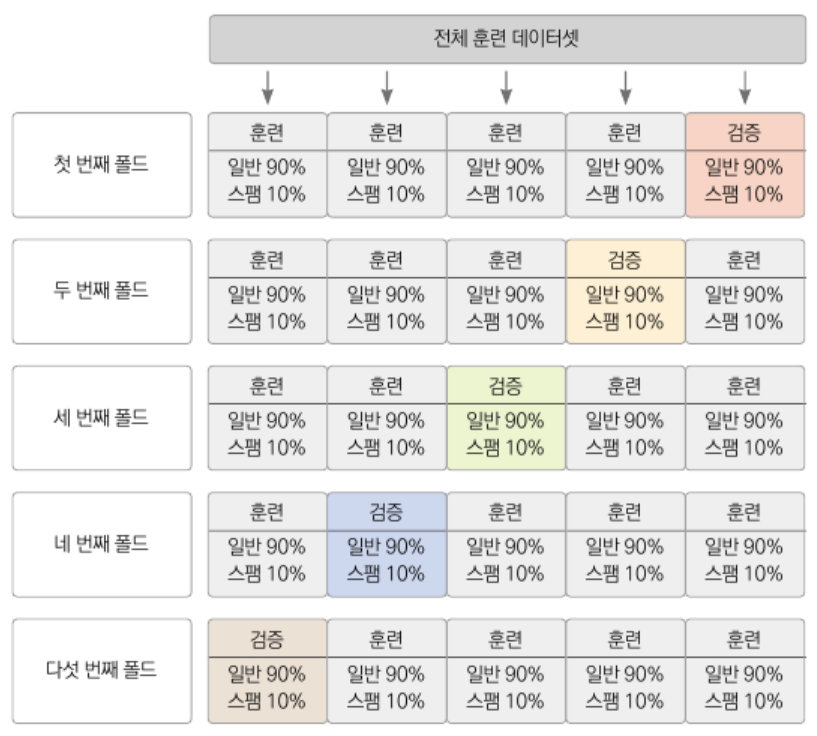

In [5]:
y = np.array(['스팸']*5 + ['일반']*45)

folds = KFold(n_splits=5, shuffle=True) # K 폴드 교차 검증

In [6]:
folds

KFold(n_splits=5, random_state=None, shuffle=True)

In [7]:
for idx, (train_idx, valid_idx) in enumerate(folds.split(y)):
    print(f'Fold {idx+1} 검증 데이터 타깃 값:')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃 값:
['스팸' '스팸' '스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃 값:
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃 값:
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



In [8]:
from sklearn.model_selection import StratifiedKFold

X = np.array(range(50))
y = np.array(['스팸']*5 + ['일반']*45)

folds = StratifiedKFold(n_splits=5) # '층화' K 폴드 교차 검증

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print(f'Fold {idx+1} 검증 데이터 타깃 값:')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



In [9]:
from sklearn.model_selection import StratifiedKFold

X = np.array(range(50))
y = np.array(['스팸']*5 + ['일반']*45)

folds = StratifiedKFold(n_splits=5, shuffle=True) # '층화' K 폴드 교차 검증

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print(f'Fold {idx+1} 검증 데이터 타깃 값:')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



### 5.6 주요 머신러닝 모델

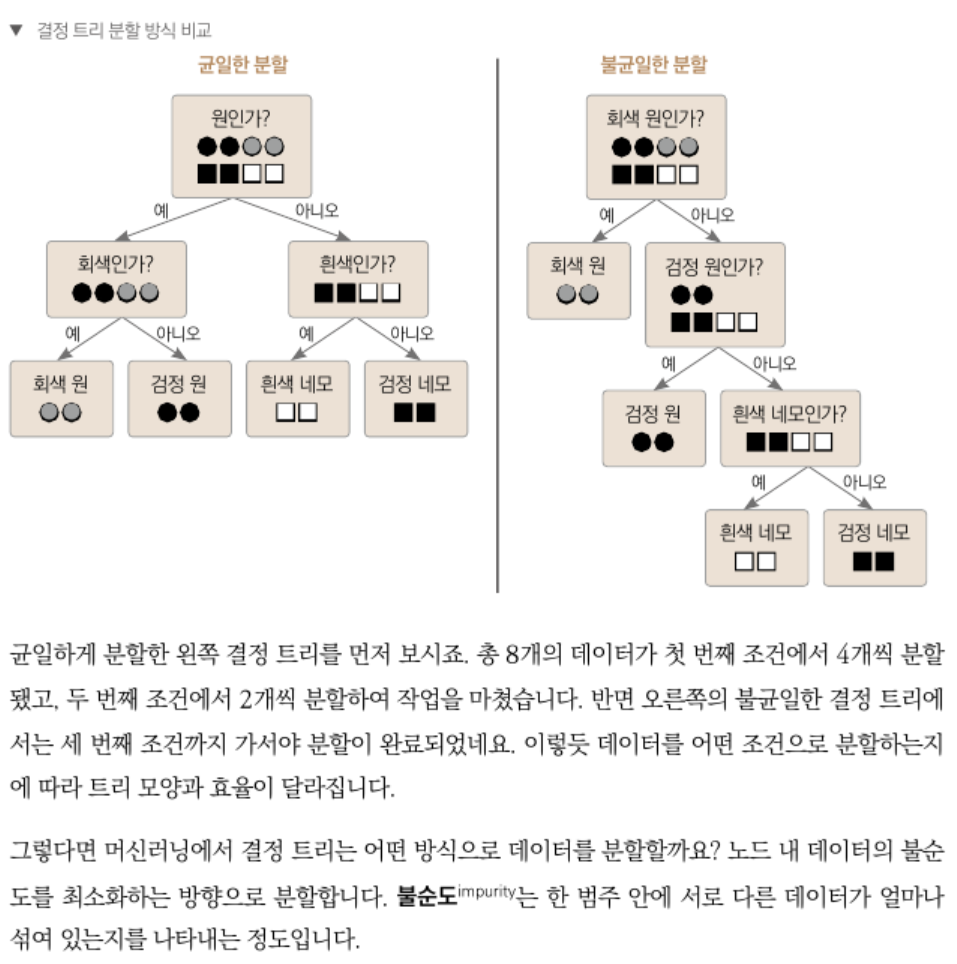

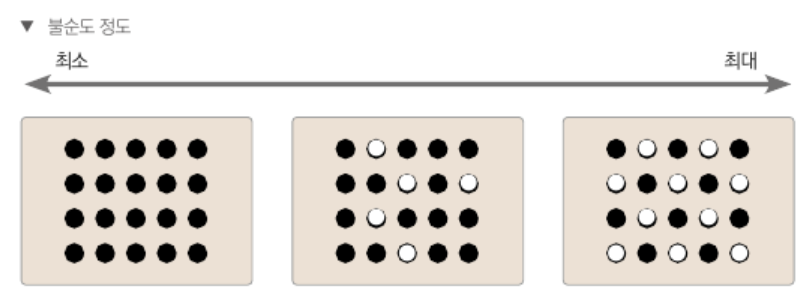

- 엔트로피 : 불확실한 정도. 예를 들어 데이터가 한종류만 있다면 엔트로피는 0. 서로 다른 데이터의 비율이 비등해질수록 엔트로피는 1에 가까워짐. 즉, 엔트로피 값이 클수록 불순도가 높음
- 정보이득 : 1에서 엔트로피를 뺀 수치, 1-엔트로피, 결정트리는 정보이득을 최대화(엔트로피를 최소화 하는 방향으로 노드를 분할 함
- 지니 불순도 : 엔트로피와 비슷한 개념, 지니 불순도가 클수록 불순도가 높다.

결정 트리의 구현  
- 분류용 : DecisionTreeClassifier
- 회귀용 : DecisionTreeRegressor

DecisionTreeClassifier의 파라미터

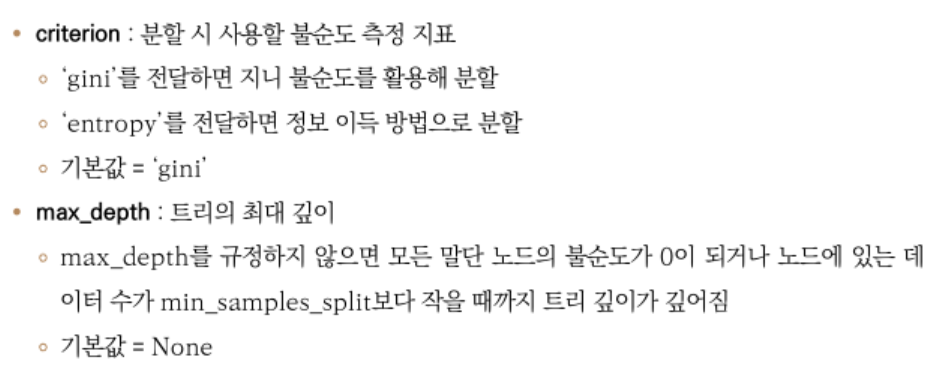

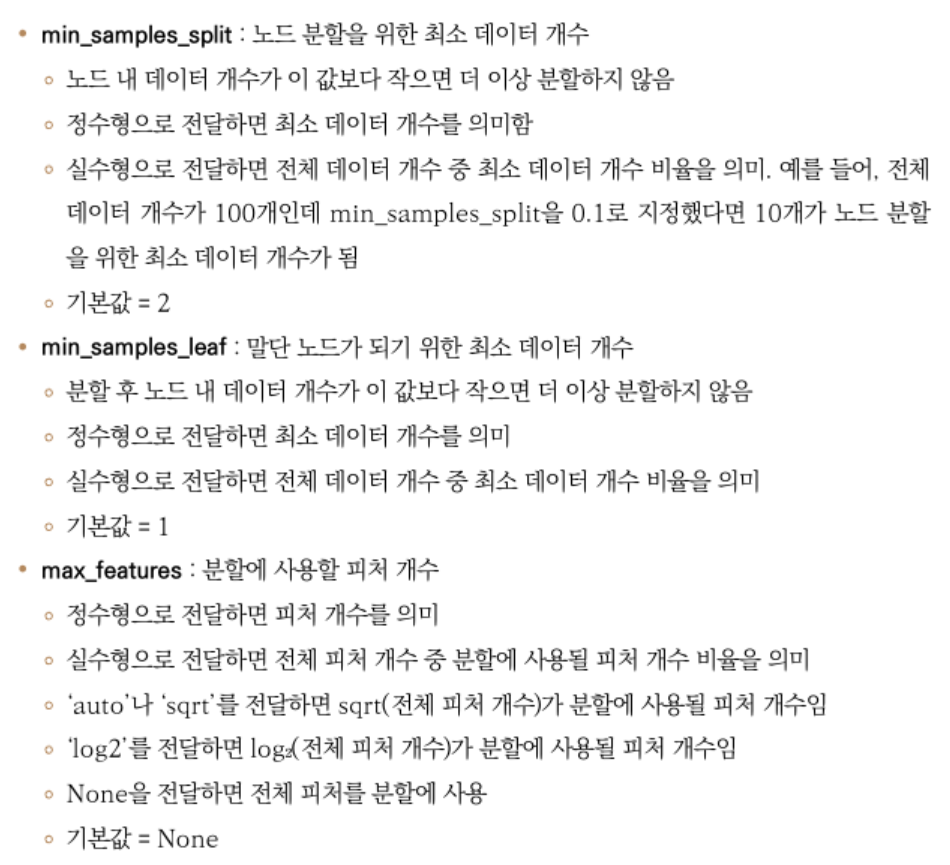

결정트리 예제 : 유방암 분류

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [4]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], 
                                                   stratify=data['target'],
                                                   test_size=0.4, 
                                                   random_state=42)

In [6]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
accuracy  = model.score(X_test, y_test)

In [7]:
print(f'모델 정확도 : {accuracy: .3f}')

모델 정확도 :  0.930


#### 앙상블 학습

보팅 : 개별 결과를 종합해 최종 결과를 결정하는 방식  
    - 하드보팅 : 다수결 투표  
    - 소프트보팅 : 개별 예측확률의 평균을 예측확률로 정함  
        
일반적으로 소프트 보팅이 성능이 좋아서 대체로 소프트 보팅을 사용

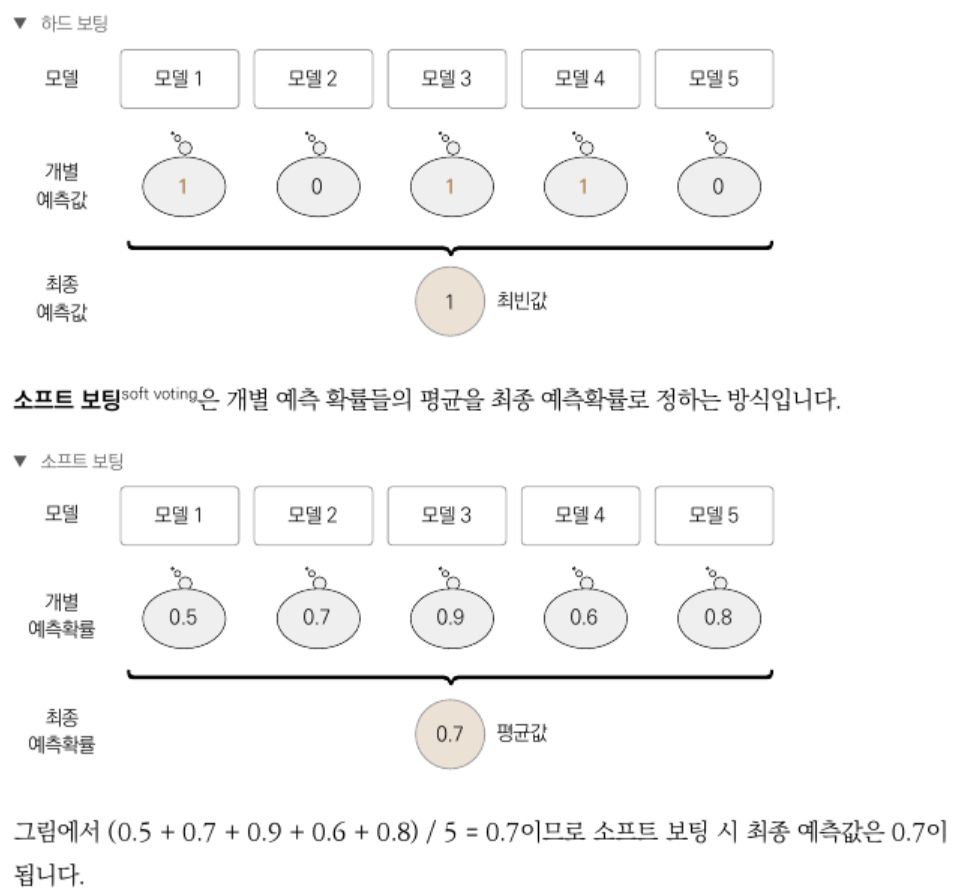

배깅(봉지에 담다) : 개별로 예측한 결과를 결과를 결합해 최종 예측을 정함  
    **개별이 서로 다른 샘플링 데이터를 활용함**

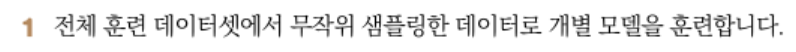

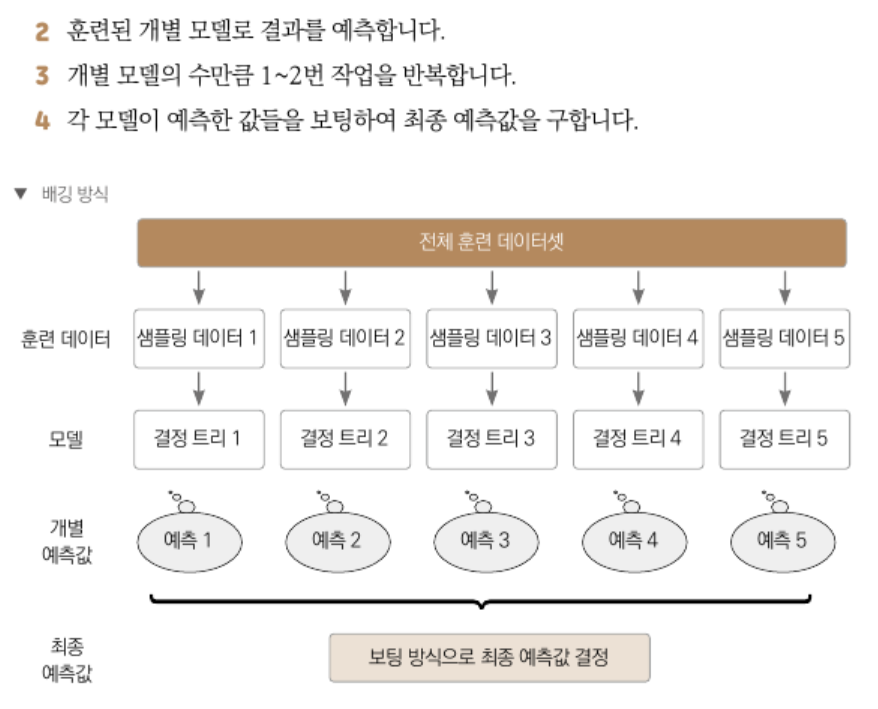

- 대표적인 배깅 기법을 활용한 모델이 랜덤 포레스트임

부스팅(북돋우다) : 가중치를 사용해 분류 성능이 약한 모델을 강하게 만드는 기법   
    
배깅은 각각의 트리가 서로 독립적으로 결과를 예측한다음 보팅으로 결과 도출.   

보팅은 모델 간 협력이 이루어짐. 예를 들어 이전 모델이 잘못 예측한 데이터에 가중치를 부여함. 다음 모델은 이전 모델이 잘못예측한 데이터(가중치가 부여된 것)에 더 집중해서 훈련함. 가중치가 부여된 데이터를 더 잘 분류하려고 함.

아래에서 +, - 를 분류하는 문제를 예로 들어보자.  
부스팅 과정은 세번 반복..

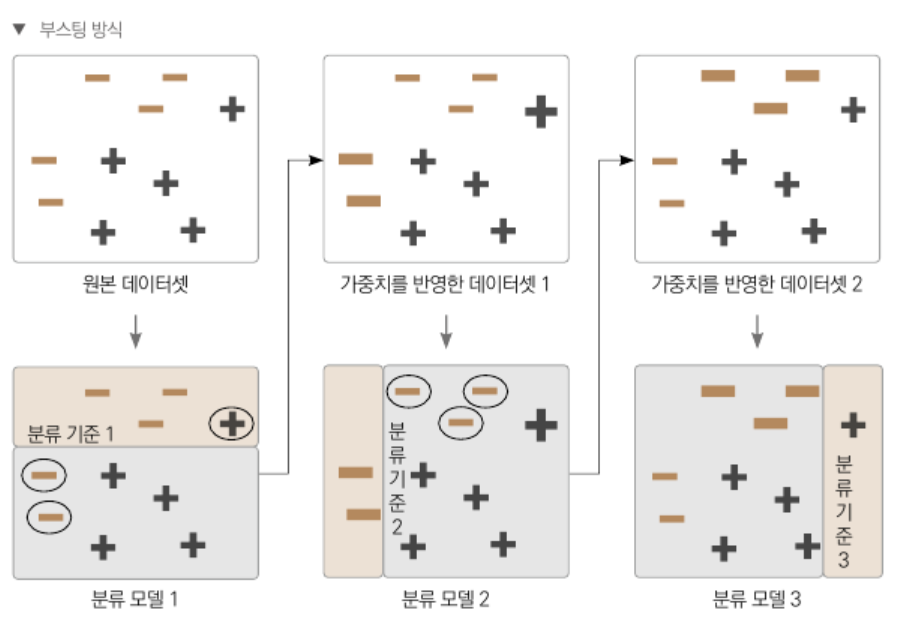

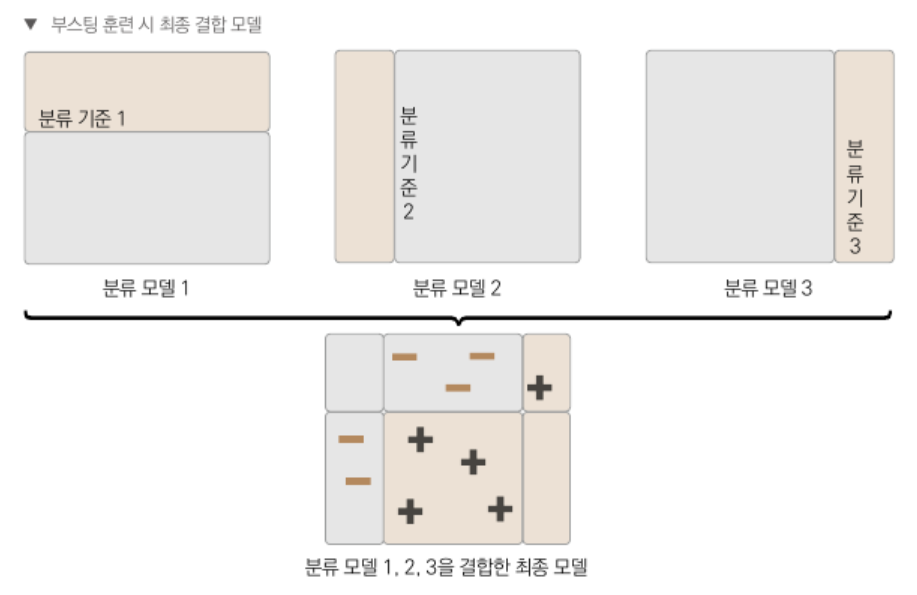

#### 랜덤 포레스트

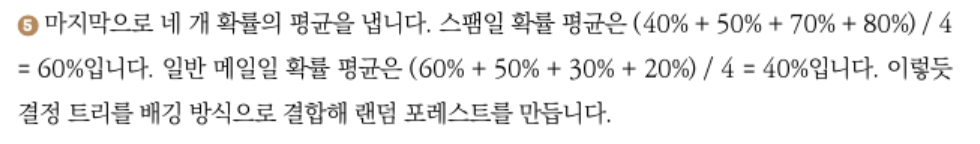

- 분류모델 : RandomForestClassifier  
- 회귀모델 : RandomForestRegressor

분류 모델의 파라미터

유방암 데이터셋으로 실습

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [9]:
data = load_breast_cancer()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'],
                                                   stratify=data['target'],
                                                   test_size=0.4, random_state=42)

In [12]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)

In [13]:
print(f'랜덤 포레스트 정확도: {accuracy:.3f}')

랜덤 포레스트 정확도: 0.939


#### XGBoost

XGBoost는 C, C++로 구현되어 있는데 래퍼의 종류에 따라 두종류가 있다.  
- 파이썬 래퍼 : 사용하려면 별도 데이터셋을 생성해야함
- 싸이킷런 래퍼 : 사이킷런처럼 fit, predict 사용가능

이 책에서는 파이썬 래퍼 XGBoost로 설명함

파이썬 래퍼를 사용하려면 DMatrix 객체를 활용해 XGBoost 전용 데이터셋을 만들어야함  
xbgoost.DMatrix() 파라미터는 다음과 같다.

XGBoost의 하이퍼파라미터는 딕셔너리 형태로 train() 메서드의 params 파라미터에 전달하면 된다.  
자주쓰는 파라미터는 다음과 같다.

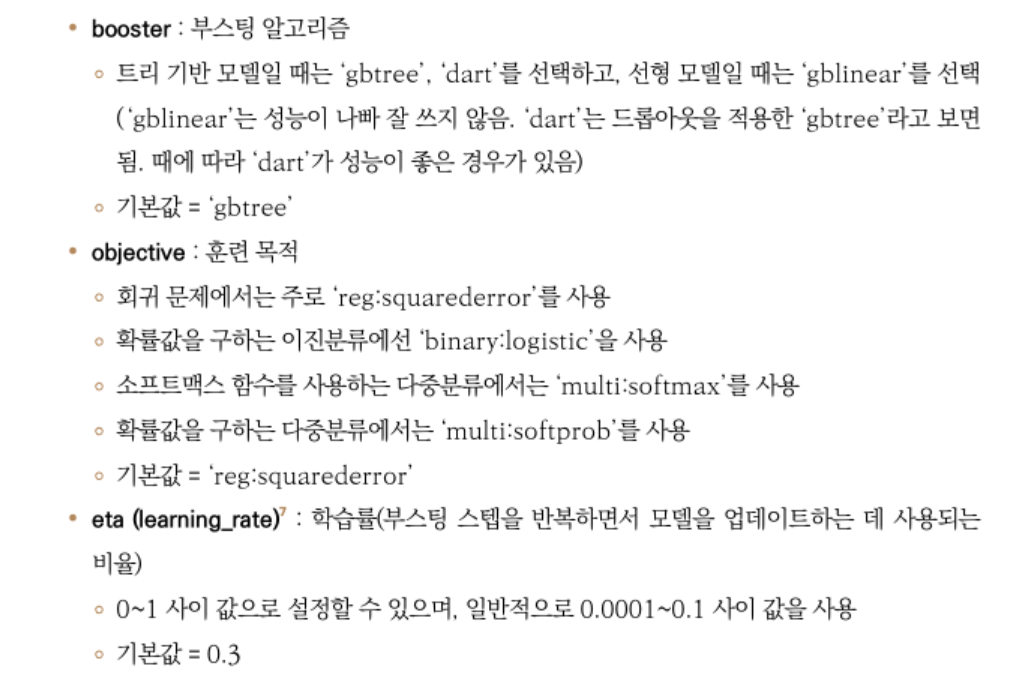

파이썬 래퍼 XGBoost는 모델 훈련을 위해 train() 메서드를 제공함.(사이킷런의 fit과 유사)  
xgboost.train()의 파라미터는 다음과 같다.

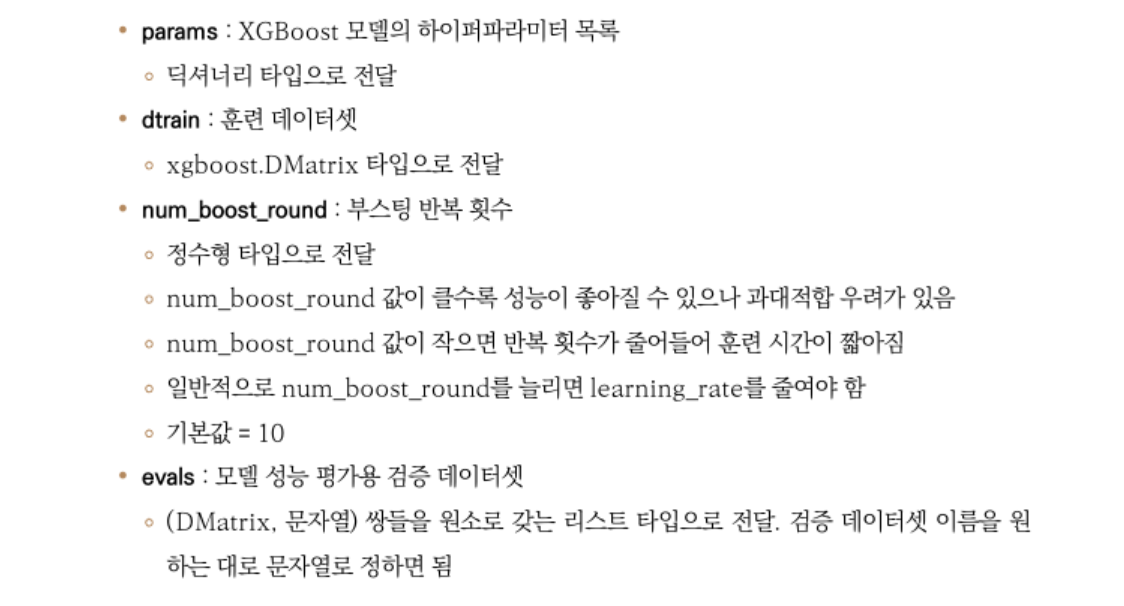

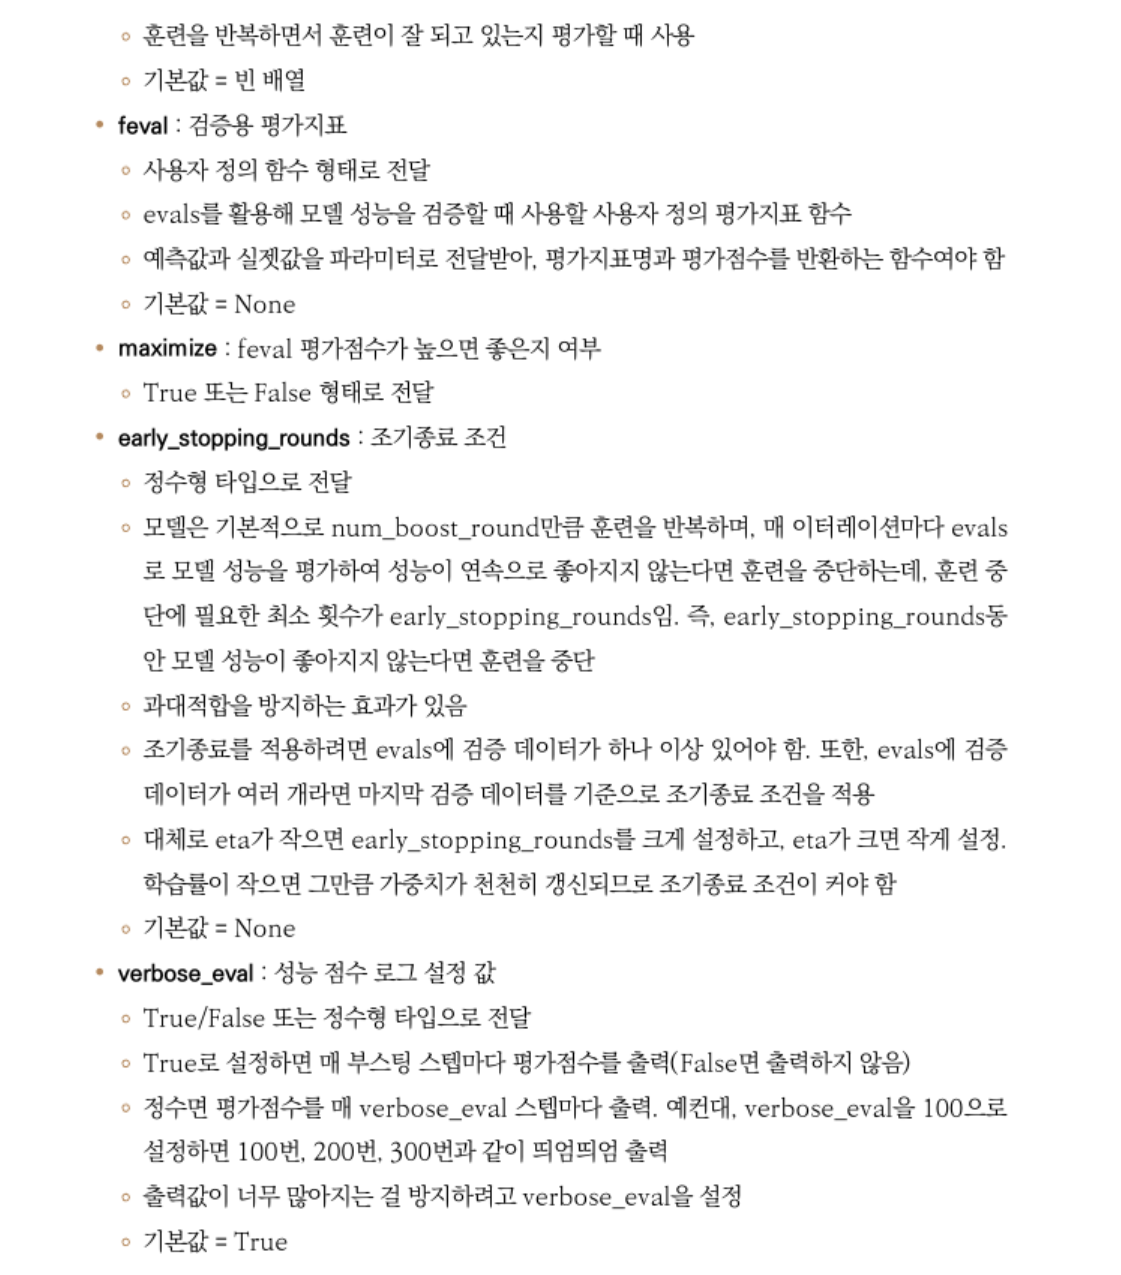

#### LightGBM

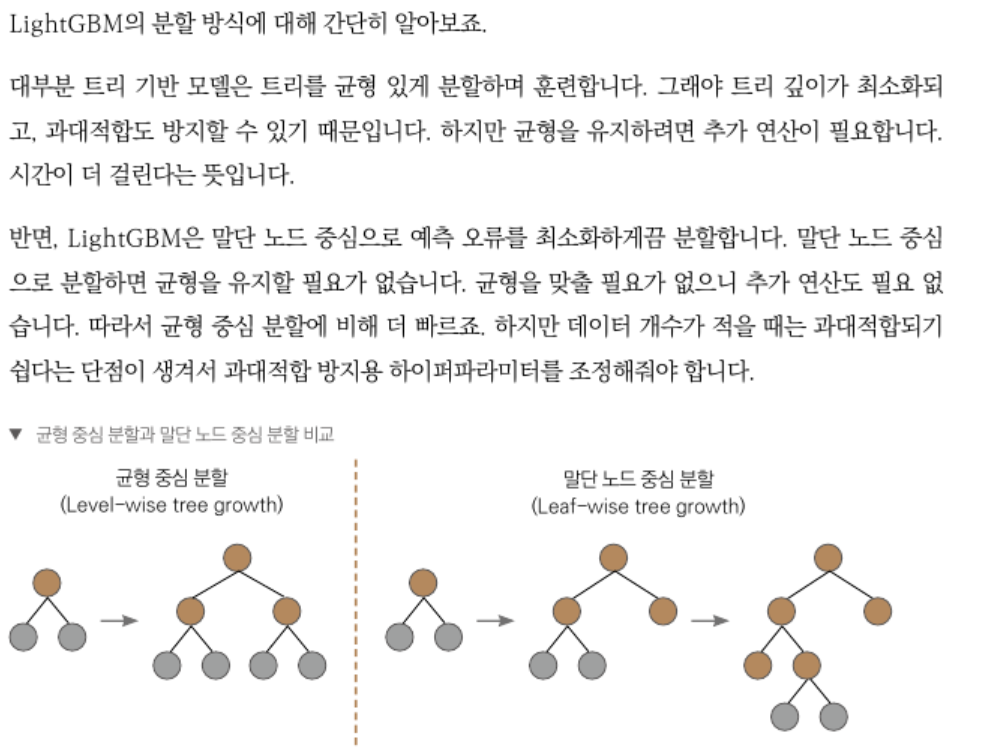

LightGBM도 파이썬 래퍼모듈, 사이킷런 래퍼모듈이 있다.  
여기서는 파이썬 래퍼 LightGBM으로 설명함

XGBoost와 LGBM의 장점  
- 피처 스케일링 필요없음  
- 레이블 인코딩 필요없음  
- 결측치를 알아서 처리해줌. 그럼에서 별도로 결측치 처리해주는 것이 좋다.

파이썬 래퍼 LGBM을 사용하려면 lightgbm.Dataset()으로 전용 데이터셋을 만들어줘야 함  

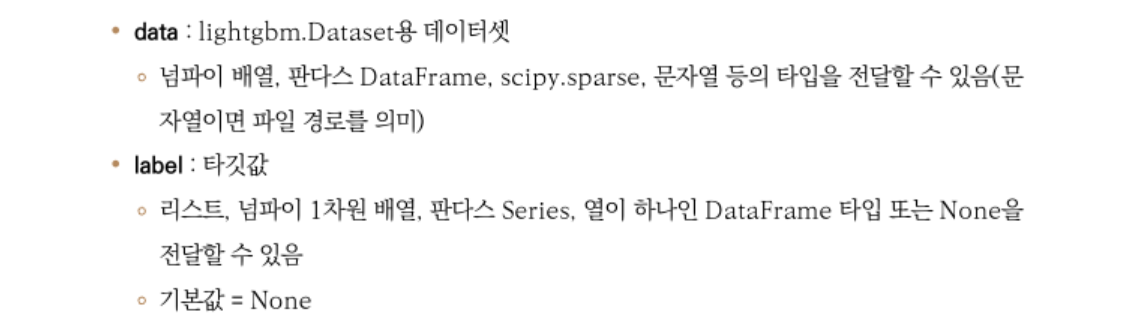

LGBM 모델 파라미터

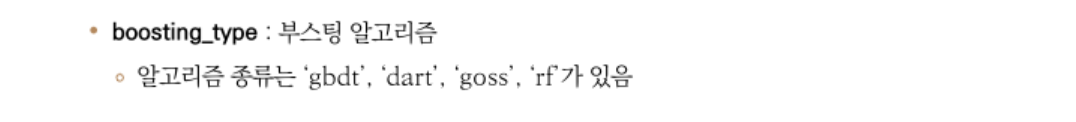

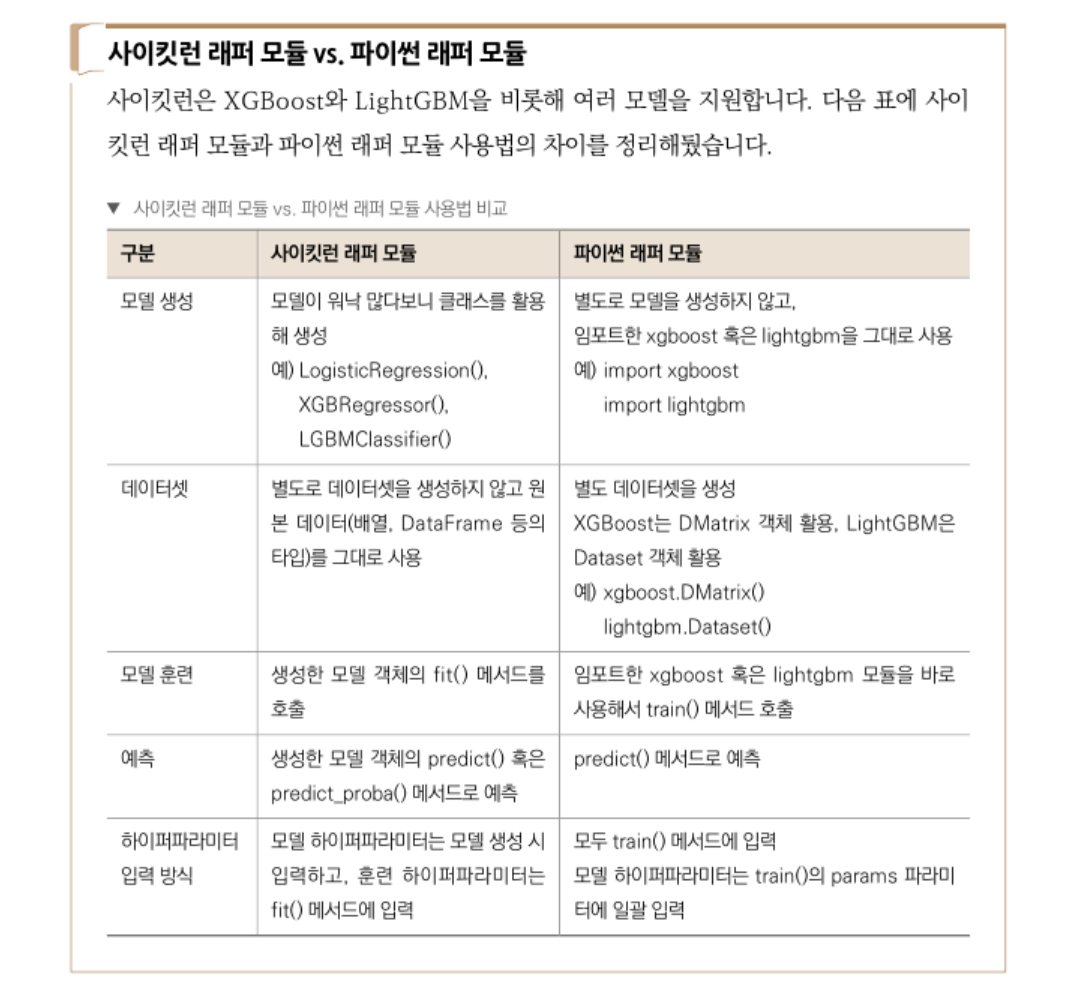

### 하이퍼파라미터 최적화

그리드서치  
랜덤서치 : 잘 사용안함

#### 베이지안 최적화

1) 하이퍼 파라미터 탐색범위 설정

In [14]:
param_bounds = {'x': (-1, 5),
               'y': (0, 4)}

2) 평가지표 계산 함수 정의

In [20]:
def eval_function(x, y):
    return -x**2 - (y-2)**2 + 10

3) 베이지안 최적화 객체 생성

In [21]:
from bayes_opt import BayesianOptimization

In [22]:
optimizer = BayesianOptimization(f=eval_function, pbounds=param_bounds, random_state=0)

4) 최적화 수행

In [23]:
optimizer.maximize(init_points = 2, n_iter=10) # init_points : 랜덤 탐색할 스텝 횟수

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  4.002    |  2.293    |  2.861    |
|  2        |  3.121    |  2.617    |  2.18     |
|  3        |  3.832    |  2.327    |  2.869    |
|  4        |  4.596    |  2.171    |  2.832    |
|  5        | -6.227    |  3.989    |  2.559    |
|  6        |  9.467    |  0.3522   |  1.361    |
|  7        |  7.39     | -1.0      |  3.269    |
|  8        |  5.0      | -1.0      |  0.0      |
|  9        |  3.841    |  1.469    |  0.0      |
|  10       |  8.966    | -1.0      |  1.817    |
|  11       |  9.737    |  0.1806   |  2.48     |
|  12       |  5.785    |  0.4638   |  4.0      |


In [24]:
# 평가 점수가 최대인 x, y
optimizer.max

{'target': 9.73708755920144,
 'params': {'x': 0.18063674445821476, 'y': 2.479877908795662}}